In [2]:
import pandas as pd
import os

#Data recuperation


In [4]:
home = "dataset/start_deep/"

#Loading data

In [5]:
df = pd.read_csv("dataset/start_deep/posneg.txt", sep=" ", names=["filename", "class"])
df = df.astype(str)
df.head()

,filename,class
0,1/Image000605.pgm,1
1,1/Image000607.pgm,1
2,1/Image000608.pgm,1
3,1/Image000609.pgm,1
4,1/Image000610.pgm,1


In [7]:
df_test = pd.read_csv("dataset/start_deep/testposneg.txt", sep=" ", names=["filename", "class"])
df_test = df_test.astype(str)
df_test.head()

,filename,class
0,"test_images/googlefaces_test/503_1__t0,0_r0_s1...",1
1,"test_images/googlefaces_test/367_0__t0,0_r0_s1...",1
2,"test_images/googlefaces_test/10_0__t0,0_r0_s1.pgm",1
3,"test_images/googlefaces_test/53_0__t0,0_r0_s1.pgm",1
4,"test_images/googlefaces_test/323_0__t0,0_r0_s1...",1


#To JPG

In [8]:
# # Changing files from pgm to jpg - run only once
#  from PIL import Image
#  for file in df_test["filename"]:
#      abs_path = home+file
#      img = Image.open(abs_path)
#      new_name = abs_path.replace(".pgm", ".jpg")
#      if new_name != abs_path:
#          img.save(new_name)
#      os.remove(abs_path)

In [9]:
# # Changing files from pgm to jpg - run only once
# from PIL import Image
# for file in df["filename"]:
#      abs_path = home+"train_images/" + file
#      img = Image.open(home+"train_images/" + file)
#      new_name = abs_path.replace(".pgm", ".jpg")
#      img.save(new_name)
#      os.remove(abs_path)

In [10]:
# renaming .pgm to jpg
def replace_name(name):
    return name.replace(".pgm", ".jpg")
df["filename"] = df["filename"].apply(replace_name)
df_test["filename"] = df_test["filename"].apply(replace_name)

In [11]:
df.head()

,filename,class
0,1/Image000605.jpg,1
1,1/Image000607.jpg,1
2,1/Image000608.jpg,1
3,1/Image000609.jpg,1
4,1/Image000610.jpg,1


#Test CNN - Ne fonctionne pas, trop de données

# Delete duplicate train Data1 Attention des erreurs

In [ ]:
from imagededup.methods import PHash
phasher = PHash()

# Generate encodings for all images in an image directory
encodings = phasher.encode_images(image_dir='dataset/start_deep/train_images/1')

# Find duplicates using the generated encodings
duplicates = phasher.find_duplicates(encoding_map=encodings)

2019-11-05 15:36:55,138: INFO Start: Calculating hashes...
100%|████████████████████████████████████████████████████████████████████████| 129540/129540 [00:53<00:00, 2426.92it/s]
2019-11-05 15:37:49,440: INFO End: Calculating hashes!
2019-11-05 15:37:49,495: INFO Start: Evaluating hamming distances for getting duplicates
2019-11-05 15:37:49,497: INFO Start: Retrieving duplicates using BKTree algorithm
  0%|                                                                                       | 0/129540 [00:00<?, ?it/s]

In [ ]:
duplicates.items()[1]

/usr/local/lib/python3.6/dist-packages/imagededup/utils/plotter.py:66: UserWarning: tight_layout : falling back to Agg renderer
  gs.tight_layout(fig)


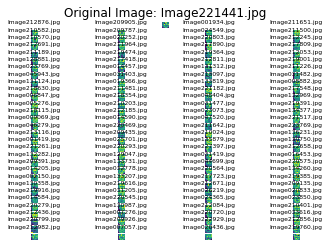

In [ ]:
from imagededup.utils import plot_duplicates
plot_duplicates('./start_deep/train_images/1', duplicate_map=duplicates, filename='Image221441.jpg')

In [ ]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir='./start_deep/train_images/1')

#Deleting test

#Delete dupplicate train Data2

In [ ]:
from imagededup.methods import PHash
phasher = PHash()

# Generate encodings for all images in an image directory
encodings = phasher.encode_images(image_dir='./start_deep/train_images/0')

# Find duplicates using the generated encodings
duplicates = phasher.find_duplicates(encoding_map=encodings)

In [ ]:
duplicates

In [ ]:
from imagededup.utils import plot_duplicates
plot_duplicates('./start_deep/train_images/0', duplicate_map=duplicates, filename='Image143355.pgm')

In [ ]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir='./start_deep/train_images/0')